In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='Malgun Gothic')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

In [5]:
stations = pd.read_csv('../oil_station/oil_station_final.csv', index_col=0)
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1872.0,Y,현대오일뱅크,강동구
1,방아다리주유소,서울 강동구 동남로 811 (명일동),1915.0,Y,SK에너지,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1925.0,Y,GS칼텍스,강동구
3,구천면주유소,서울 강동구 구천면로 357 (암사동),1935.0,N,현대오일뱅크,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1956.0,Y,현대오일뱅크,강동구
...,...,...,...,...,...,...
441,제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
442,대청주유소,서울 강남구 개포로 654 (일원동),2399.0,N,SK에너지,강남구
443,갤러리아주유소,서울 강남구 압구정로 426,2493.0,N,SK에너지,강남구
444,SK논현주유소,서울 강남구 논현로 747 (논현동),2541.0,N,SK에너지,강남구


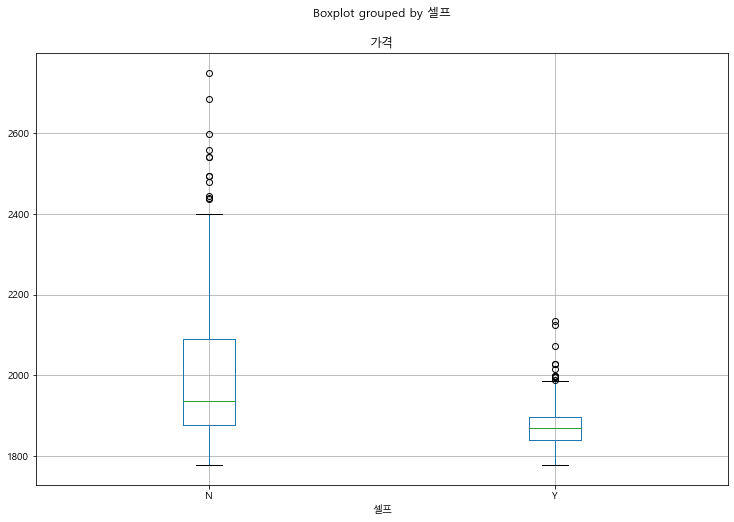

In [6]:
stations.boxplot(column='가격', by = '셀프', figsize=(12,8));

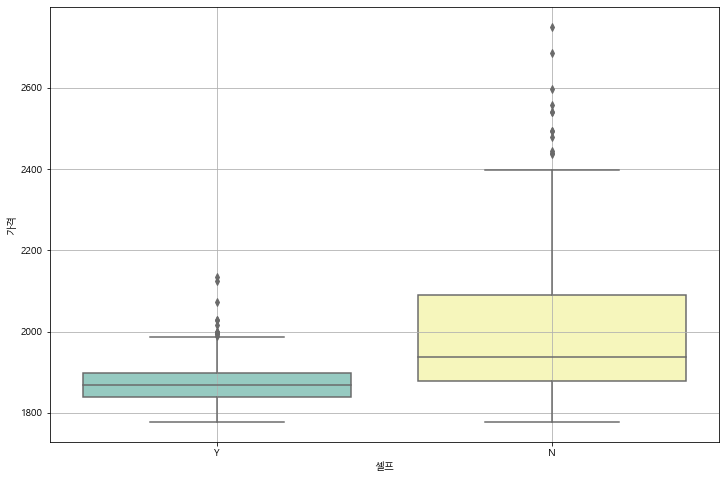

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='셀프', y='가격', data=stations, palette='Set3')
plt.grid()
plt.show()

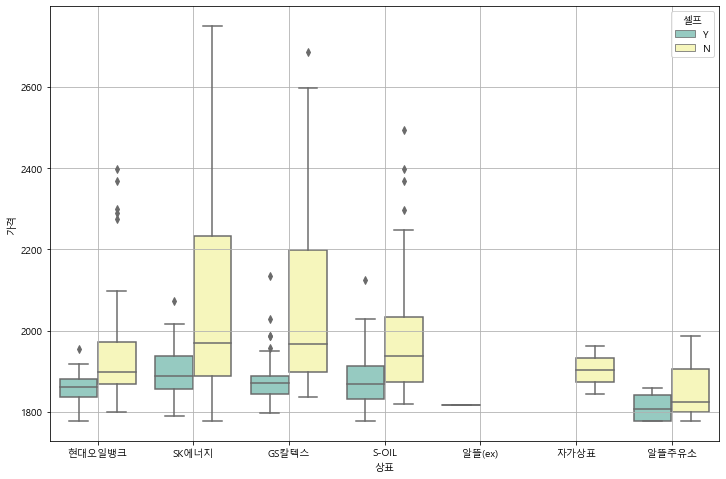

In [15]:
# 각 브랜드별 셀프 주유 여부 포함 가격 분포
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.grid()
plt.show()

---
# 지도 시각화

In [16]:
import json
import folium
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
277,서남주유소,서울 중구 통일로 30,2750.0,N,SK에너지,중구
243,서계주유소,서울특별시 용산구 청파로 367 (청파동),2685.0,N,GS칼텍스,용산구
445,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
276,필동주유소,서울 중구 퇴계로 196 (필동2가),2559.0,N,GS칼텍스,중구
444,SK논현주유소,서울 강남구 논현로 747 (논현동),2541.0,N,SK에너지,강남구
369,구로주유소,서울 구로구 구로동로 137 (구로동),2540.0,N,GS칼텍스,구로구
97,양재최고주유소,서울 서초구 매헌로 72 (양재동),2495.0,N,S-OIL,서초구
443,갤러리아주유소,서울 강남구 압구정로 426,2493.0,N,SK에너지,강남구
267,SK북악주유소,서울 종로구 평창문화로 137,2478.0,N,SK에너지,종로구
266,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2445.0,N,GS칼텍스,종로구


In [18]:
stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
168,현대주유소,서울 양천구 남부순환로 372 (신월동),1777.0,Y,S-OIL,양천구
167,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1777.0,N,SK에너지,양천구
294,화곡역주유소,서울 강서구 강서로 154 (화곡동),1777.0,Y,알뜰주유소,강서구
293,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1777.0,Y,현대오일뱅크,강서구
292,목화주유소,서울 강서구 국회대로 251 (화곡동),1777.0,Y,알뜰주유소,강서구
291,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1777.0,N,알뜰주유소,강서구
169,양천구주유소,서울 양천구 국회대로 275 (목동),1777.0,Y,알뜰주유소,양천구
170,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1789.0,Y,SK에너지,양천구
295,스카이주유소,서울 강서구 개화동로 457 (방화동),1789.0,Y,S-OIL,강서구
381,화랑대주유소,서울 노원구 화랑로 483,1795.0,Y,현대오일뱅크,노원구


In [19]:
import numpy as np

gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,2091.911765
강동구,1996.357143
강북구,1834.166667
강서구,1894.843750
관악구,1923.571429


In [21]:
geo_path = '../data2/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

m = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

m.choropleth(
    geo_data = geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    fill_color='PuRd',
    key_on = 'feature.id',
)
m